<table class="table table-bordered">
    <tr>
        <th style="text-align:center; width:35%"><img src='https://mma.prnewswire.com/media/1860917/NTUC_LHUB_Logo.jpg' style="width: 350px; height: 125px; "></th>
        <th style="text-align:center;"><h1>Project 2 - Healthcare - Predictive Analytics</h1><h2>A Data Analysis - Building Models  </h2><h3></h3></th>
    </tr>
</table>

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
cardio_df = pd.read_csv('cardio_cleaned.csv')

In [3]:
cardio_df.head(1)

,active,alco,ap_hi,ap_lo,cholesterol,gluc,smoke,disease,age(yr),BMI
0,1,0,110,80,1,1,0,0,50,21.97


In [4]:
x = cardio_df.drop('disease', axis=1)
y = cardio_df['disease']

In [5]:
x.head(5)

,active,alco,ap_hi,ap_lo,cholesterol,gluc,smoke,age(yr),BMI
0,1,0,110,80,1,1,0,50,21.97
1,1,0,140,90,3,1,0,55,34.93
2,0,0,130,70,3,1,0,51,23.51
3,1,0,150,100,1,1,0,48,28.71
4,0,0,100,60,1,1,0,47,23.01


In [6]:
y.head(5)

0    0
1    1
2    1
3    1
4    0
Name: disease, dtype: int64

# Spliting data

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
# The dataset will be split into 70% training, 30% testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, stratify=y, random_state=42)

# Scaling data

In [9]:
from sklearn.preprocessing import MinMaxScaler

In [10]:
scaler = MinMaxScaler()

In [11]:
scaler.fit(x_train)

MinMaxScaler()

In [12]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

# Build Baseline Model

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
SEED = 42

In [15]:
lg_baseline = LogisticRegression(random_state=SEED)

In [16]:
lg_baseline.fit(x_train, y_train)

LogisticRegression(random_state=42)

# Evaluate Model Performance with Cross-validation

In [17]:
from sklearn.model_selection import cross_validate, KFold

In [18]:
kfold = KFold(n_splits=5, shuffle=True, random_state=SEED)

In [19]:
# Access various information including fit times and predict times
cv_results = cross_validate(lg_baseline, x_train, y_train, cv=kfold, scoring=['accuracy'], return_train_score=True, n_jobs=-1)

In [20]:
print("Training Score:", cv_results['train_accuracy'].mean())
print("Test Score:", cv_results['test_accuracy'].mean())
print("Fit Time:", cv_results['fit_time'].mean(), 'seconds')
print("Predict Time:", cv_results['score_time'].mean(), 'seconds')

Training Score: 0.7288021189632771
Test Score: 0.7286047412211789
Fit Time: 0.18897452354431152 seconds
Predict Time: 0.0033994197845458986 seconds


Baseline model gives a moderately good accuracy.

# Build Other Models

In [21]:
#KNN Classification
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [22]:
#Support Vector Machine
from sklearn.svm import SVC
svc = SVC(random_state=SEED)
svc.fit(x_train,y_train)

SVC(random_state=42)

In [23]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=SEED)
dt.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [24]:
#naive bayes (Gaussian)
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train,y_train)

GaussianNB()

In [25]:
#naive bayes (multinomial)
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
mnb.fit(x_train,y_train)

MultinomialNB()

In [26]:
#Ramdom Forest
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=SEED)
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [27]:
#Gradient Boosting
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(random_state=SEED)
gb.fit(x_train,y_train)

GradientBoostingClassifier(random_state=42)

In [28]:
#XGBoost
import xgboost
xgb = xgboost.XGBClassifier(random_state=SEED)
xgb.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [29]:
import lightgbm
lgbm = lightgbm.LGBMClassifier()
lgbm.fit(x_train,y_train)

[LightGBM] [Info] Number of positive: 23814, number of negative: 24304
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002110 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 457
[LightGBM] [Info] Number of data points in the train set: 48118, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.494908 -> initscore=-0.020367
[LightGBM] [Info] Start training from score -0.020367


LGBMClassifier()

# Model Performance Summary

In [30]:
models = [lg_baseline, KNN, svc, dt, gnb, mnb, rf, gb, xgb, lgbm]
model_names = [type(model).__name__ for model in models]
result_table = pd.DataFrame(columns=['Model','Training Accuracy','Test Accuracy','Fit Time (seconds)','Predict Time (seconds)','Total time taken (seconds)'])

for model, m_name in zip(models, model_names):
    cv_results = cross_validate(model, x_train, y_train, cv=kfold, scoring=['accuracy'], return_train_score=True, n_jobs=-1)
    train_accu = cv_results['train_accuracy'].mean()
    test_accu = cv_results['test_accuracy'].mean()
    fit = cv_results['fit_time'].mean()
    pred = cv_results['score_time'].mean()
    total = fit + pred
    result_table = pd.concat([result_table,pd.DataFrame({'Model':[m_name], 'Training Accuracy':[train_accu],
                                                         'Test Accuracy':[test_accu],'Fit Time (seconds)':[fit], 'Predict Time (seconds)':[pred],
                                                        'Total time taken (seconds)':[total]})],ignore_index=True)

In [31]:
result_table_sorted = result_table.sort_values(by='Test Accuracy', ascending = False)
display(result_table_sorted)

,Model,Training Accuracy,Test Accuracy,Fit Time (seconds),Predict Time (seconds),Total time taken (seconds)
7,GradientBoostingClassifier,0.739100,0.736086,11.011225,0.042396,11.053620
9,LGBMClassifier,0.749683,0.735691,2.344214,0.072413,2.416627
2,SVC,0.734502,0.733115,272.019578,90.312729,362.332307
8,XGBClassifier,0.766699,0.731577,1.315840,0.122408,1.438248
0,LogisticRegression,0.728802,0.728605,0.242364,0.004601,0.246965
4,GaussianNB,0.710898,0.710940,0.074805,0.018202,0.093007
1,KNeighborsClassifier,0.787491,0.700528,0.316820,13.033179,13.349999
6,RandomForestClassifier,0.973160,0.689617,23.728847,1.133219,24.862066
3,DecisionTreeClassifier,0.973243,0.643979,1.042613,0.019403,1.062017
5,MultinomialNB,0.601454,0.602539,0.075006,0.010403,0.085409


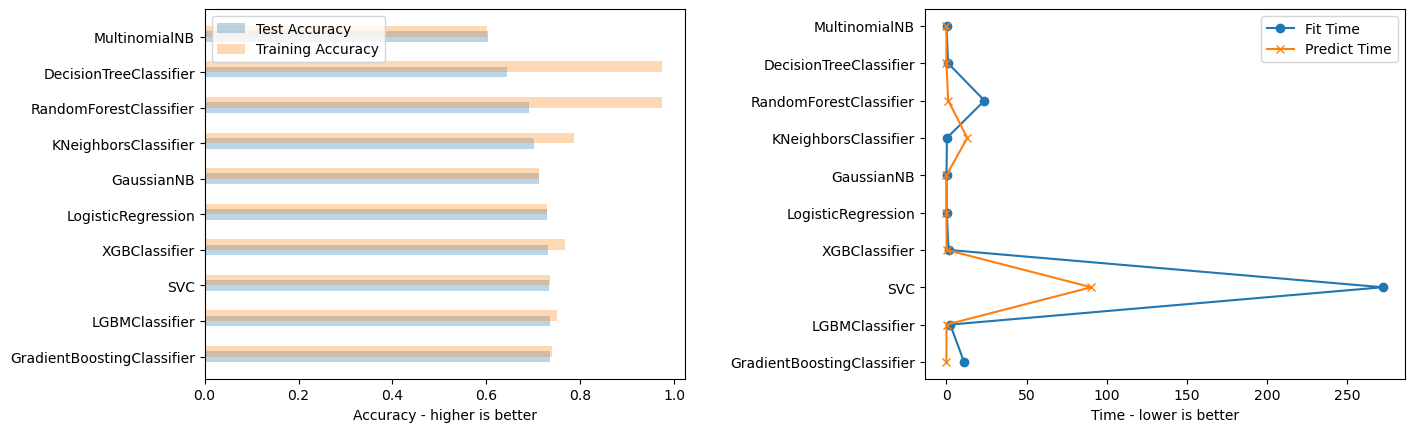

In [32]:
plt.subplot(1,2,1)
plt.barh(width=result_table_sorted['Test Accuracy'],y=result_table_sorted['Model'], alpha=0.3, height=0.3, label='Test Accuracy')
plt.barh(width=result_table_sorted['Training Accuracy'],y=result_table_sorted['Model'],align='edge', alpha=0.3, height=0.3, label='Training Accuracy')
plt.legend(loc='upper left')
plt.xlabel('Accuracy - higher is better')
plt.subplot(1,2,2)
plt.plot(result_table_sorted['Fit Time (seconds)'],result_table_sorted['Model'], marker='o', label='Fit Time')
plt.plot(result_table_sorted['Predict Time (seconds)'],result_table_sorted['Model'], marker='x', label='Predict Time')
plt.legend()
plt.xlabel('Time - lower is better')
plt.subplots_adjust(wspace=0.5, right=2)
plt.show()

<font color="blue">We observed that by using model default parameters, models under Gradient Boosting (GradientBoostingClassifier, LGBMClassifier, XGBClassifier) generally give 73% test accuracy and above. As LGBMClassifier and XGBClassifier do not give better test accuracy compared to GradientBoostingClassifier, we will drop these two models.

<font color="blue">SVC also has test accuracy above 73%. However, the time taken for training and predicting is at least 10 times more than other models, causing high computational cost. Since there are more efficient model available, we will drop this model.

<font color="blue">Both RandomForestClassifier and DecisionTreeCLassifier show a different trend from other models. They have high Training Score but low Test Score, indicating the models have overfitting issue. Adjusting the hyperparameters may largely improve the accuracy.

<font color="blue">Multinomial Naive Bayes gives very low accuracy while there is no parameters that we can tune for Gaussian Naive Bayes to further improve accuracy. Therefore we will drop these two models.

<font color="blue">We will select Gradient Boosting Classifier, Logistic Regression, Decision Tree, Random Forest, and K-NearestNeighbours for Hyperparameter Optimization

# Hyperparameters Optimization

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the classifiers
classifiers = {
    'GradientBoostingClassifier': GradientBoostingClassifier(random_state=SEED),
    'LogisticRegression': LogisticRegression(random_state=SEED),
    'DecisionTreeClassifier': DecisionTreeClassifier(random_state=SEED),
    'RandomForestClassifier': RandomForestClassifier(random_state=SEED),
    'KNeighborsClassifier': KNeighborsClassifier()
}

# Define the parameter grids for each classifier
param_grids = {
    'GradientBoostingClassifier': {'classifier__n_estimators': [50, 100, 200], 'classifier__learning_rate': [0.01, 0.1, 0.2]},
    'LogisticRegression': {'classifier__C': [1, 10, 20], 'classifier__solver': ['lbfgs', 'liblinear']},
    'DecisionTreeClassifier': {'classifier__max_depth': [3, 5, 25], 'classifier__max_leaf_nodes': [10,20,100]},
    'RandomForestClassifier': {'classifier__n_estimators': [100,300,500], 'classifier__max_depth': [3, 10, 50], 'classifier__max_leaf_nodes': [20,100,250]},
    'KNeighborsClassifier': {'classifier__n_neighbors': [5, 30, 50], 'classifier__weights': ['uniform','distance']}
}

# Create pipelines for each classifier
pipelines = {name: Pipeline([('classifier', clf)]) for name, clf in classifiers.items()}

# Perform grid search for each classifier
results = {}
for name, pipeline in pipelines.items():
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(x_train, y_train)
    results[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'cv_results': grid_search.cv_results_
    }

In [34]:
Models = [
    'GradientBoostingClassifier',
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'KNeighborsClassifier']

Tabs = ['A', 'B', 'C', 'D', 'E']

op_table = pd.DataFrame(columns=['Model','Fit Time (seconds)','Predict Time (seconds)','Test Accuracy (Optimized)'])

for tab, Model in zip(Tabs, Models):
    tab_df = pd.DataFrame(results[Model]['cv_results'])
    num_entries = len(tab_df)  # Get the number of entries in cv_results
    for num in range(num_entries):
        if tab_df['rank_test_score'][num] == 1:
            fit_time = tab_df['mean_fit_time'][num]
            score_time = tab_df['mean_score_time'][num]
            Test_accuracy = tab_df['mean_test_score'][num]
            op_table = pd.concat([op_table,pd.DataFrame({'Model':[Model],'Fit Time (seconds)':[fit_time],
                                                         'Predict Time (seconds)':[score_time],'Test Accuracy (Optimized)':[Test_accuracy]})],ignore_index=True)


In [35]:
op_table

,Model,Fit Time (seconds),Predict Time (seconds),Test Accuracy (Optimized)
0,GradientBoostingClassifier,29.326427,0.084816,0.736003
1,LogisticRegression,0.544563,0.008398,0.728667
2,DecisionTreeClassifier,0.206340,0.011000,0.731930
3,RandomForestClassifier,50.548057,1.332388,0.735587
4,KNeighborsClassifier,0.545051,18.250148,0.728355


In [36]:
compare_table = op_table.merge(result_table_sorted[['Model','Test Accuracy']],how='inner',on='Model')

In [37]:
compare_table

,Model,Fit Time (seconds),Predict Time (seconds),Test Accuracy (Optimized),Test Accuracy
0,GradientBoostingClassifier,29.326427,0.084816,0.736003,0.736086
1,LogisticRegression,0.544563,0.008398,0.728667,0.728605
2,DecisionTreeClassifier,0.206340,0.011000,0.731930,0.643979
3,RandomForestClassifier,50.548057,1.332388,0.735587,0.689617
4,KNeighborsClassifier,0.545051,18.250148,0.728355,0.700528


In [38]:
compare_table['% Difference'] = (compare_table['Test Accuracy (Optimized)'] - compare_table['Test Accuracy'])*100

In [39]:
compare_table['% Difference'] = compare_table['% Difference'].map('{:.2f}'.format)

In [40]:
compare_table.sort_values(by='Test Accuracy (Optimized)', ascending=False)

,Model,Fit Time (seconds),Predict Time (seconds),Test Accuracy (Optimized),Test Accuracy,% Difference
0,GradientBoostingClassifier,29.326427,0.084816,0.736003,0.736086,-0.01
3,RandomForestClassifier,50.548057,1.332388,0.735587,0.689617,4.60
2,DecisionTreeClassifier,0.206340,0.011000,0.731930,0.643979,8.80
1,LogisticRegression,0.544563,0.008398,0.728667,0.728605,0.01
4,KNeighborsClassifier,0.545051,18.250148,0.728355,0.700528,2.78


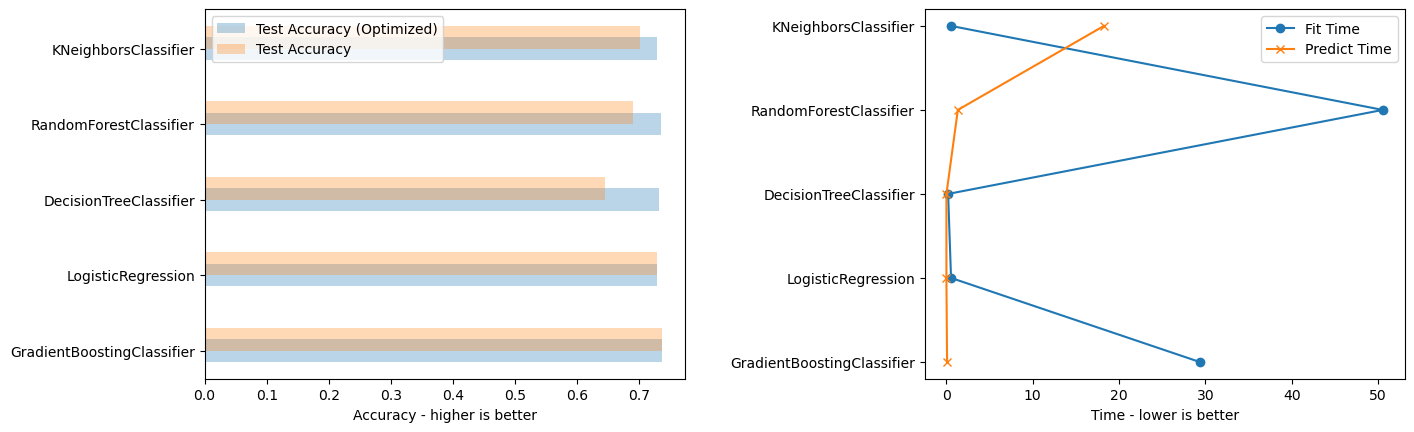

In [41]:
plt.subplot(1,2,1)
plt.barh(width=compare_table['Test Accuracy (Optimized)'],y=compare_table['Model'], alpha=0.3, height=0.3, label='Test Accuracy (Optimized)')
plt.barh(width=compare_table['Test Accuracy'],y=compare_table['Model'],align='edge', alpha=0.3, height=0.3, label='Test Accuracy')
plt.legend(loc='upper left')
plt.xlabel('Accuracy - higher is better')
plt.subplot(1,2,2)
plt.plot(compare_table['Fit Time (seconds)'],compare_table['Model'], marker='o', label='Fit Time')
plt.plot(compare_table['Predict Time (seconds)'],compare_table['Model'], marker='x', label='Predict Time')
plt.legend()
plt.xlabel('Time - lower is better')
plt.subplots_adjust(wspace=0.5, right=2)
plt.show()

<font color="blue">After hyperparameters optimization, it is observed that all 5 models have similar test acuracy ranging from 72.8% to 73.6%. 
Decision Tree model has the highest % improvement after hyperparameters optimization, around 9% increase.

<font color="blue">In terms of time taken for model training and prediction, Random Forest took the longest time while Decision Time is the fastest model among the 5 models.

<font color="blue">In considering the difference of accuracy between all 5 models is insignificant, we choose Decision Tree model that requires least computation cost as our best model.

# Model Evaluation

In [42]:
#best parameters for Decision Tree model
results['DecisionTreeClassifier']['best_params']

{'classifier__max_depth': 5, 'classifier__max_leaf_nodes': 20}

In [43]:
dt_op = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, random_state=SEED)
dt_op.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, max_leaf_nodes=20, random_state=42)

In [44]:
print('Training Accuracy: ',dt_op.score(x_train,y_train), '\nTest Accuracy: ', dt_op.score(x_test,y_test))

Training Accuracy:  0.7334053784446569 
Test Accuracy:  0.7287979440430588


In [45]:
y_pred = dt_op.predict(x_test)

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
dfConfu = confusion_matrix(y_test, y_pred)

In [48]:
print(dfConfu)

[[8206 2210]
 [3383 6824]]


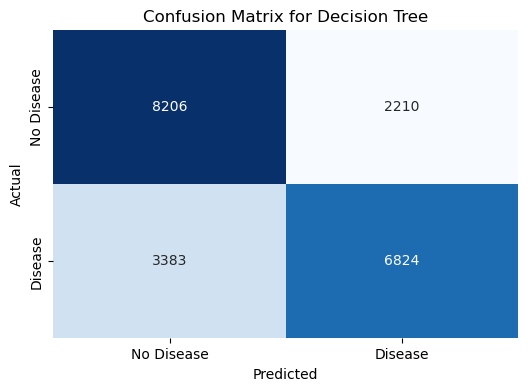

In [49]:
plt.figure(figsize=(6, 4))
sns.heatmap(dfConfu, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Decision Tree')
plt.show()

In [50]:
from sklearn.metrics import classification_report

In [51]:
report_dt = classification_report(y_test, y_pred, target_names=['No Disease','Disease'])

In [52]:
print(report_dt)

              precision    recall  f1-score   support

  No Disease       0.71      0.79      0.75     10416
     Disease       0.76      0.67      0.71     10207

    accuracy                           0.73     20623
   macro avg       0.73      0.73      0.73     20623
weighted avg       0.73      0.73      0.73     20623



<font color="blue">The final Decision Tree model gives a test accuracy of 72.9% using Test Data.

<font color="blue">Out of the cases predicted with Heart Disease, 76% are actually diagnosed with Heart Disease.
Out of the cases predicted with no Heart Disease, 71% are actually diagnosed with no Heart Disease.

<font color="blue">From all cases with Heart Disease, 67% are predicted correctly.
From all cases with no Heart Disease, 79% are predicted correctly.

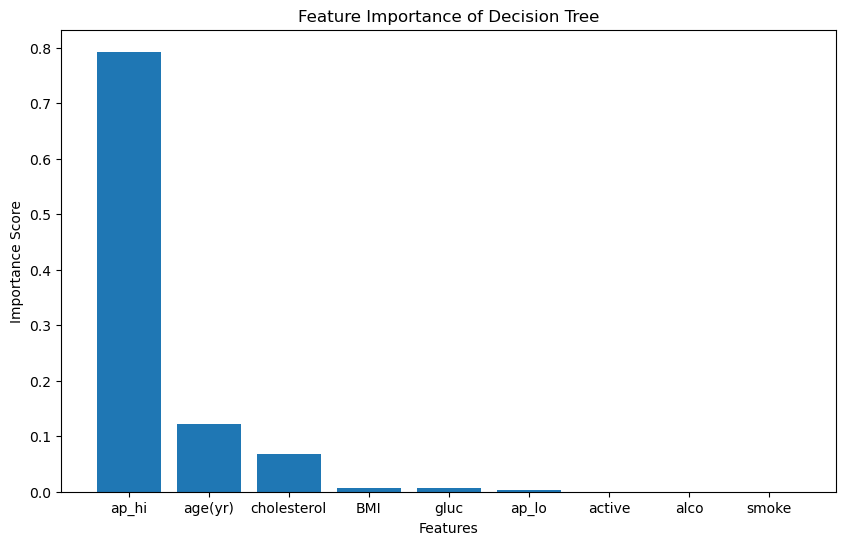

In [53]:
feature_importances = dt_op.feature_importances_
feature_names = x.columns
sorted_indices = (-feature_importances).argsort()
sorted_feature_names = [feature_names[i] for i in sorted_indices]
sorted_feature_importances = [feature_importances[i] for i in sorted_indices]


plt.figure(figsize=(10, 6))
plt.bar(sorted_feature_names, sorted_feature_importances, align='center')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.title('Feature Importance of Decision Tree')
plt.show()

<font color="blue">From above chart, the top three most important features in predicting Heart Disease are systolic blood pressure (the pressure in your arteries when your heart beats or contracts to pump blood out into the body), age, and cholesterol level.

# Conclusion and Recommendation

Overall the model test score is not sufficiently high for an efficient prediction. There could be few possible reasons contributing to this model result:

1) The data given is likely to have been manually adjusted to give a sample population of Disease almost same as No Disease. In real world, the population with heart disease is about 5-10% out of the total population. In contrast, 50% of the records in the given data has heart disease. This adjustment might have certain impacts to some features in correlation to our prediction target.

2) Some features such as cholesterol level and glucose level are given in categories instead of numerical data, causing loss of details in data. Numerical data gives more details and may give higher correlation to our prediction target leading to an improvement of model accuracy.

3) The given features may not be sufficient to give a better prediction. Additional features might be needed.

Some recommendations to improve the model are:

1) Include more features such as 'Family History' and 'Presence of Diabetes'

2) To look for original data that has not been adjusted and features like cholesterol level and glucose level are in numerical form. 